In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ari_results = []

# List of CSV file paths
csv_files = [
    'results/tpot-clustering/experiment_summary.csv',
    'results/chs/experiment_summary.csv',
    'results/dbs/experiment_summary.csv',
    'results/sil/experiment_summary.csv',
    'results/tpe-autoclust/experiment_summary.csv',
    'results/ml2dac/experiment_summary.csv'
]

# Step 1: Loop through each CSV file
for file in csv_files:
    # Step 2: Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Step 3: Filter out rows where 'adjusted_rand_score' contains non-numeric values
    df = df[pd.to_numeric(df['adjusted_rand_score'], errors='coerce').notna()]
    
    # Step 4: Calculate the average ARI
    ari_value = df['adjusted_rand_score'].astype(float).mean()  # Convert to float before taking mean
    
    # Extract the optimization name
    optimization_name = file.split('/')[1]  # Extract the second-to-last part of the path

    # Step 5: Append the result to the list
    ari_results.append({'Optimization': optimization_name, 'ARI': ari_value})

# Step 6: Create a DataFrame to display the results
ari_df = pd.DataFrame(ari_results)
ari_df_sorted = ari_df.sort_values(by='ARI', ascending=False)
ari_df_sorted = ari_df_sorted.reset_index(drop=True)

# Display the sorted DataFrame
print(ari_df_sorted)


      Optimization    ARI
0  tpot-clustering 0.3363
1              sil 0.2938
2              chs 0.2785
3           ml2dac 0.2044
4              dbs 0.1913
5    tpe-autoclust 0.1563


In [4]:
import pandas as pd
import glob
import re
# Initialize an empty dictionary to hold ARI scores for each dataset
ari_results = {}

# Dynamically find all CSV files named "experiment_summary.csv" in the results folder
csv_files = glob.glob('results/**/experiment_summary.csv', recursive=True)

def count_pipeline_steps(pipeline_string):
    # Use regular expression to find keys (step names) in the pipeline string
    matches = re.findall(r"'(\w+)'(?=:)", pipeline_string)

    # Count the number of unique steps
    num_steps = len(matches)

    return num_steps

# Step 1: Loop through each CSV file found
for file in csv_files:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    df = df[pd.to_numeric(df['adjusted_rand_score'], errors='coerce').notna()]
    df = df[df["Dataset"] != "R15.csv"]
    df = df[df["Dataset"] != "aggregation.csv"]
    df = df[df["Dataset"] != "cluto-t8-8k.csv"]
    df = df[df["Dataset"] != "haberman.csv"]
     # Check if 'Best_Pipeline' column exists in the DataFrame
    if 'Best_Pipeline' in df.columns:
        # Check if 'Best_Pipeline' has non-null values and apply the preprocessing function
        df['steps'] = df['Best_Pipeline'].apply(count_pipeline_steps) if not df['Best_Pipeline'].isna().all() else False
        # break
    else:
        # If 'Best_Pipeline' column is missing, set the 'steps' column to False for all rows
        df['steps'] = 0
    print(file)
    df.to_csv(file,index=None)

results/dbs/experiment_summary.csv
results/tpe-autoclust/experiment_summary.csv
results/tpot-clustering/experiment_summary.csv
results/sil/experiment_summary.csv
results/ml2dac/experiment_summary.csv
results/chs/experiment_summary.csv


In [6]:
import pandas as pd
import glob
import ast  # To safely evaluate string representation of the dictionary

# Initialize an empty dictionary to hold ARI scores for each dataset
ari_results = {}

# Dynamically find all CSV files named "experiment_summary.csv" in the results folder
csv_files = glob.glob('results/**/experiment_summary.csv', recursive=True)

def has_preprocessing(pipeline_str):
    try:
        # Split the pipeline string by commas to approximate the number of steps
        steps = pipeline_str.strip('{}').split(',')
        # Count steps: More than one step implies preprocessing
        return len(steps) > 1
    except Exception as e:
        # If any error occurs, assume no preprocessing
        return False

# Step 1: Loop through each CSV file found
for file in csv_files:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    df = df[pd.to_numeric(df['adjusted_rand_score'], errors='coerce').notna()]
    df = df[df["Dataset"] != "R15.csv"]
    df = df[df["Dataset"] != "aggregation.csv"]
    df = df[df["Dataset"] != "cluto-t8-8k.csv"]
    df = df[df["Dataset"] != "haberman.csv"]
    # Extract the algorithm name dynamically from the file path
    optimization_name = file.split('/')[-2]  # The folder containing the CSV file

    # Step 2: Loop through each dataset in the file
    for _, row in df.iterrows():
        # Remove '.csv' from dataset name if present
        dataset_name = row['Dataset'].replace('.csv', '')  
        ari_value = float(row['adjusted_rand_score'])
        # If the dataset is not already in the results, add it
        if dataset_name not in ari_results:
            ari_results[dataset_name] = {}
        
        # Add the ARI score for this algorithm and limit to 4 decimals
        ari_results[dataset_name][optimization_name] = round(ari_value, 4)

# Step 3: Convert the results dictionary into a DataFrame
ari_df = pd.DataFrame.from_dict(ari_results, orient='index').reset_index()
ari_df.rename(columns={'index': 'Dataset'}, inplace=True)

# Step 4: Sort datasets alphabetically and ensure columns are sorted by ARI
ari_df = ari_df.sort_values(by='Dataset').reset_index(drop=True)

# Step 5: Display the formatted DataFrame with 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)

# Rename the columns
ari_df = ari_df.rename(columns={
    'Dataset': 'Dataset',
    'dbs': 'TPOT-DBS',
    'chs': 'TPOT-CHS',
    'sil': 'TPOT-SIL',
    'tpe-autoclust': 'TPE-Autoclust',
    'ml2dac': 'Ml2dac',
    'tpot-clustering': 'TPOT-Clustering'
})

# Reorder the columns
ari_df = ari_df[['Dataset', 'TPE-Autoclust', 'Ml2dac', 'TPOT-CHS', 'TPOT-DBS', 'TPOT-SIL', 'TPOT-Clustering']]


In [13]:
ari_df

,Dataset,TPE-Autoclust,Ml2dac,TPOT-CHS,TPOT-DBS,TPOT-SIL,TPOT-Clustering
0,3-spiral,0.0317,0.0849,0.1170,0.1146,-0.0059,-0.0043
1,arrhythmia,0.0045,0.0337,0.0077,0.0108,0.0376,0.0432
2,balance-scale,0.0749,0.0377,0.0805,0.0970,0.1020,0.1303
3,cassini,0.6396,0.3055,0.6407,0.6832,0.6466,0.5264
4,cluto-t7-10k,0.2371,0.1812,0.2777,0.4065,0.4078,0.5656
5,compound,0.3959,0.2127,0.5152,0.4841,0.4681,0.4681
6,disk-6000n,0.0776,-0.0060,0.0832,-0.0001,-0.0003,0.0892
7,ecoli,0.1297,0.1535,0.3857,0.2243,0.0044,0.0380
8,elliptical_10_2,0.1343,0.0000,0.1835,0.1835,0.1835,0.1835
9,engytime,0.3284,0.0329,0.5608,0.0000,0.0000,0.5577


In [8]:
import pandas as pd
import glob
import ast  # To safely evaluate string representation of the dictionary

# Initialize an empty dictionary to hold ARI scores for each dataset
steps_results = {}

# Dynamically find all CSV files named "experiment_summary.csv" in the results folder
csv_files = glob.glob('results/**/experiment_summary.csv', recursive=True)

# Step 1: Loop through each CSV file found
for file in csv_files:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    df = df[pd.to_numeric(df['steps'], errors='coerce').notna()]
    df = df[df["Dataset"] != "R15.csv"]
    df = df[df["Dataset"] != "aggregation.csv"]
    df = df[df["Dataset"] != "cluto-t8-8k.csv"]
    df = df[df["Dataset"] != "haberman.csv"]
    # Extract the algorithm name dynamically from the file path
    optimization_name = file.split('/')[-2]  # The folder containing the CSV file

    # Step 2: Loop through each dataset in the file
    for _, row in df.iterrows():
        # Remove '.csv' from dataset name if present
        dataset_name = row['Dataset'].replace('.csv', '')  
        steps_value = int(row['steps'])
        # If the dataset is not already in the results, add it
        if dataset_name not in steps_results:
            steps_results[dataset_name] = {}
        steps_results[dataset_name][optimization_name] = steps_value

# Step 3: Convert the results dictionary into a DataFrame
steps_df = pd.DataFrame.from_dict(steps_results, orient='index').reset_index()
steps_df.rename(columns={'index': 'Dataset'}, inplace=True)

# Step 4: Sort datasets alphabetically and ensure columns are sorted by ARI
steps_df = steps_df.sort_values(by='Dataset').reset_index(drop=True)

# Rename the columns
steps_df = steps_df.rename(columns={
    'Dataset': 'Dataset',
    'dbs': 'TPOT-DBS',
    'chs': 'TPOT-CHS',
    'sil': 'TPOT-SIL',
    'tpe-autoclust': 'TPE-Autoclust',
    'ml2dac': 'Ml2dac',
    'tpot-clustering': 'TPOT-Clustering'
})

# Reorder the columns
steps_df = steps_df[['Dataset', 'TPE-Autoclust', 'Ml2dac', 'TPOT-CHS', 'TPOT-DBS', 'TPOT-SIL', 'TPOT-Clustering']]
steps_df['Ml2dac']=1

In [15]:
steps_df[['Dataset','TPOT-CHS','TPOT-DBS','TPOT-SIL','TPOT-Clustering','TPE-Autoclust', 'Ml2dac']]

,Dataset,TPOT-CHS,TPOT-DBS,TPOT-SIL,TPOT-Clustering,TPE-Autoclust,Ml2dac
0,3-spiral,1,1,1,2,0,1
1,arrhythmia,2,2,2,2,0,1
2,balance-scale,2,2,1,2,0,1
3,cassini,1,1,1,1,0,1
4,cluto-t7-10k,1,1,2,1,0,1
5,compound,1,1,1,1,0,1
6,disk-6000n,1,2,1,2,0,1
7,ecoli,2,2,4,2,0,1
8,elliptical_10_2,1,1,1,1,0,1
9,engytime,1,1,1,2,0,1


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

np.random.seed(42)
pd.set_option('display.max_columns', 7)
std = 0.3
ari_df.to_csv("results.csv", index=False)

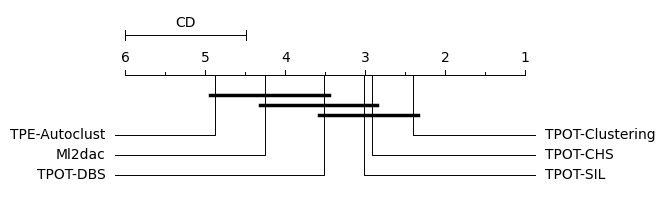

In [11]:
autorank_result = autorank(ari_df.drop(columns=["Dataset"]), alpha=0.05, verbose=False)
plot_stats(autorank_result)
plt.savefig('frameworks_nemenyi.pdf', format='pdf', dpi=300, bbox_inches='tight')  # You can change 'feature_importances.pdf' to your desired filename
plt.show()

In [12]:
autorank_result

RankResult(rankdf=                 meanrank  median    mad ci_lower ci_upper effect_size  \
TPE-Autoclust      4.8800  0.0879 0.0464   0.0239   0.4533      0.0000   
Ml2dac             4.2600  0.0892 0.0856   0.0000   0.7899     -0.0127   
TPOT-DBS           3.5200  0.1427 0.0623   0.0333   0.5998     -0.6729   
TPOT-SIL           3.0200  0.2532 0.2111   0.0044   0.6466     -0.7295   
TPOT-CHS           2.9200  0.1961 0.1234   0.0727   0.6407     -0.7829   
TPOT-Clustering    2.4000  0.3309 0.2286   0.0421   0.8846     -0.9937   

                  magnitude  
TPE-Autoclust    negligible  
Ml2dac           negligible  
TPOT-DBS             medium  
TPOT-SIL             medium  
TPOT-CHS             medium  
TPOT-Clustering       large  , pvalue=np.float64(7.578710367260856e-06), cd=np.float64(1.5079029976176144), omnibus='friedman', posthoc='nemenyi', all_normal=False, pvals_shapiro=[np.float64(0.0002989355288409064), np.float64(2.843874595542454e-05), np.float64(0.02539615825799811), 

In [6]:
ranked_df = ari_df.set_index('Dataset').rank(axis=1, ascending=False)
ranked_df

,TPE-Autoclust,Ml2dac,TPOT-CHS,TPOT-DBS,TPOT-SIL,TPOT-Clustering
Dataset,,,,,,
3-spiral,4.0000,3.0000,1.0000,2.0000,6.0000,5.0000
arrhythmia,6.0000,3.0000,5.0000,4.0000,2.0000,1.0000
balance-scale,5.0000,6.0000,4.0000,3.0000,2.0000,1.0000
cassini,4.0000,6.0000,3.0000,1.0000,2.0000,5.0000
cluto-t7-10k,5.0000,6.0000,4.0000,3.0000,2.0000,1.0000
compound,5.0000,6.0000,1.0000,2.0000,3.5000,3.5000
disk-6000n,3.0000,6.0000,2.0000,4.0000,5.0000,1.0000
ecoli,4.0000,3.0000,1.0000,2.0000,6.0000,5.0000
elliptical_10_2,5.0000,6.0000,2.5000,2.5000,2.5000,2.5000


In [8]:
# Step 5: Bold the highest value in each row (LaTeX formatting)
def highlight_max_latex(row):
    max_value = row.max()
    # Return a pandas Series instead of a list to avoid shape mismatch
    return row.apply(lambda x: f"\\textbf{{{x:.4f}}}" if x == max_value else f"{x:.4f}")

# Apply the function correctly using `apply` with axis=1
ari_df_formatted = ari_df.copy()
ari_df_formatted.iloc[:, 1:] = ari_df.iloc[:, 1:].apply(highlight_max_latex, axis=1)

# Step 6: Export the formatted DataFrame to LaTeX
latex_table = ari_df_formatted[['Dataset', 'TPE-Autoclust', 'Ml2dac', 'TPOT-CHS', 'TPOT-DBS', 'TPOT-SIL', 'TPOT-Clustering']].to_latex(
    index=False,
    escape=False,  # Allow LaTeX commands like \textbf{} to work
    caption="ARI Scores for Various Clustering Algorithms",
    label="tab:ari_scores",
    column_format="lccccccc"
)

# Save the LaTeX table to a file
with open("ari_results_table.tex", "w") as f:
    f.write(latex_table)

# Display the LaTeX code for review
print(latex_table)


\begin{table}
\caption{ARI Scores for Various Clustering Algorithms}
\label{tab:ari_scores}
\begin{tabular}{lccccccc}
\toprule
Dataset & TPE-Autoclust & Ml2dac & TPOT-CHS & TPOT-DBS & TPOT-SIL & TPOT-Clustering \\
\midrule
3-spiral & 0.0317 & 0.0849 & \textbf{0.1170} & 0.1146 & -0.0059 & -0.0043 \\
arrhythmia & 0.0045 & 0.0337 & 0.0077 & 0.0108 & 0.0376 & \textbf{0.0432} \\
balance-scale & 0.0749 & 0.0377 & 0.0805 & 0.0970 & 0.1020 & \textbf{0.1303} \\
cassini & 0.6396 & 0.3055 & 0.6407 & \textbf{0.6832} & 0.6466 & 0.5264 \\
cluto-t7-10k & 0.2371 & 0.1812 & 0.2777 & 0.4065 & 0.4078 & \textbf{0.5656} \\
compound & 0.3959 & 0.2127 & \textbf{0.5152} & 0.4841 & 0.4681 & 0.4681 \\
disk-6000n & 0.0776 & -0.0060 & 0.0832 & -0.0001 & -0.0003 & \textbf{0.0892} \\
ecoli & 0.1297 & 0.1535 & \textbf{0.3857} & 0.2243 & 0.0044 & 0.0380 \\
elliptical_10_2 & 0.1343 & 0.0000 & \textbf{0.1835} & \textbf{0.1835} & \textbf{0.1835} & \textbf{0.1835} \\
engytime & 0.3284 & 0.0329 & \textbf{0.5608} & 0.0000 

/tmp/ipykernel_34028/1352292338.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0.0317
1     0.0045
2     0.0749
3     0.6396
4     0.2371
5     0.3959
6     0.0776
7     0.1297
8     0.1343
9     0.3284
10    0.0662
11    0.2359
12    0.0720
13    0.0239
14    0.1312
15    0.0501
16    0.1184
17    0.3436
18    0.4533
19    0.0636
20    0.0214
21    0.0175
22    0.0422
23    0.0879
24    0.1267
Name: TPE-Autoclust, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ari_df_formatted.iloc[:, 1:] = ari_df.iloc[:, 1:].apply(highlight_max_latex, axis=1)
/tmp/ipykernel_34028/1352292338.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0              0.0849
1              0.0337
2              0.0377
3              0.3055
4              0.1812
5              0.2127
6             -0.00

In [9]:
# Export the DataFrame to LaTeX format (sorted columns order specified)
latex_table = ari_df[['Dataset', 'TPE-Autoclust', 'Ml2dac', 'TPOT-CHS', 'TPOT-DBS', 'TPOT-SIL', 'TPOT-Clustering']].to_latex(
    index=False,  # Do not include the index column in the LaTeX table
    float_format="%.4f",  # Limit decimal precision to 4 places
    caption="ARI Scores for Various Clustering Algorithms",  # Add a caption for the table
    label="tab:ari_scores",  # Add a label for referencing in LaTeX
    column_format="lccccccc"  # Alignments: left for Dataset, centered for scores
)

# Save the LaTeX table to a .tex file
with open("ari_results_table.tex", "w") as f:
    f.write(latex_table)

# Display the LaTeX code for review
print(latex_table)


\begin{table}
\caption{ARI Scores for Various Clustering Algorithms}
\label{tab:ari_scores}
\begin{tabular}{lccccccc}
\toprule
Dataset & TPE-Autoclust & Ml2dac & TPOT-CHS & TPOT-DBS & TPOT-SIL & TPOT-Clustering \\
\midrule
3-spiral & 0.0317 & 0.0849 & 0.1170 & 0.1146 & -0.0059 & -0.0043 \\
arrhythmia & 0.0045 & 0.0337 & 0.0077 & 0.0108 & 0.0376 & 0.0432 \\
balance-scale & 0.0749 & 0.0377 & 0.0805 & 0.0970 & 0.1020 & 0.1303 \\
cassini & 0.6396 & 0.3055 & 0.6407 & 0.6832 & 0.6466 & 0.5264 \\
cluto-t7-10k & 0.2371 & 0.1812 & 0.2777 & 0.4065 & 0.4078 & 0.5656 \\
compound & 0.3959 & 0.2127 & 0.5152 & 0.4841 & 0.4681 & 0.4681 \\
disk-6000n & 0.0776 & -0.0060 & 0.0832 & -0.0001 & -0.0003 & 0.0892 \\
ecoli & 0.1297 & 0.1535 & 0.3857 & 0.2243 & 0.0044 & 0.0380 \\
elliptical_10_2 & 0.1343 & 0.0000 & 0.1835 & 0.1835 & 0.1835 & 0.1835 \\
engytime & 0.3284 & 0.0329 & 0.5608 & 0.0000 & 0.0000 & 0.5577 \\
flame & 0.0662 & 0.1386 & 0.4297 & 0.1042 & 0.4534 & 0.4649 \\
fourty & 0.2359 & 0.0000 & 0.2725

/tmp/ipykernel_53552/114620044.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y='ARI', data=ari_long, palette="muted", width=0.7,


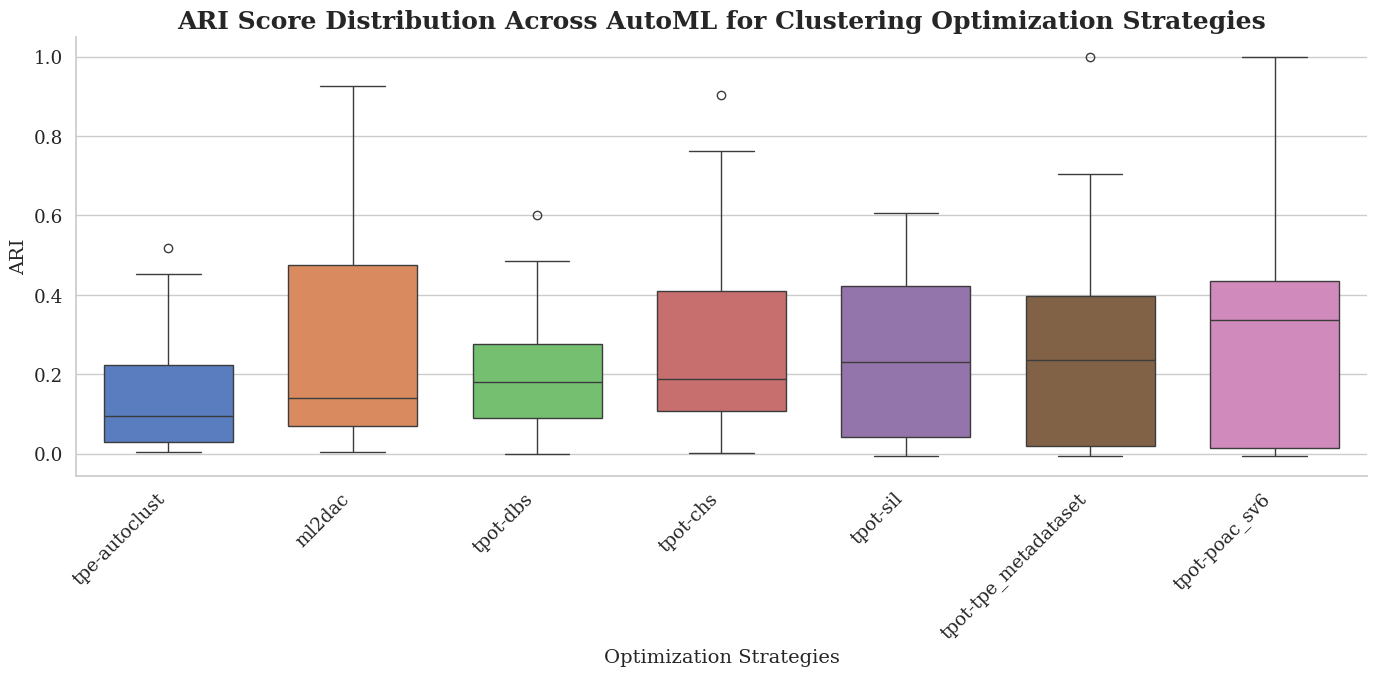

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the DataFrame to long format for easier plotting
ari_long = ari_df.melt(id_vars='Dataset', var_name='Algorithm', value_name='ARI')

# Calculate the median ARI per algorithm to sort them
median_ari = ari_long.groupby('Algorithm')['ARI'].median().sort_values()

# Set a scientific style with serif fonts for a professional look
sns.set_theme(style="whitegrid", font_scale=1.2, rc={"font.family": "serif"})
plt.figure(figsize=(14, 7))

# Enhanced boxplot, ordered by median ARI
sns.boxplot(x='Algorithm', y='ARI', data=ari_long, palette="muted", width=0.7, 
            order=median_ari.index)  # Order by median ARI values

# Title and labels with scientific clarity
plt.title('ARI Score Distribution Across AutoML for Clustering Optimization Strategies', fontsize=18, weight='bold')
plt.ylabel('ARI', fontsize=14)
plt.xlabel('Optimization Strategies', fontsize=14)
plt.xticks(rotation=45, ha="right")

# Remove top and right borders for a cleaner look
sns.despine()

# Save for high-quality use in scientific papers
plt.tight_layout()
plt.savefig("ari_distribution_plot_sorted.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [16]:
import pandas as pd
import os

# Assuming `count_pipeline_steps` is already defined
def count_pipeline_steps(pipeline_string):
    # Use regular expression to find keys (step names) in the pipeline string
    matches = re.findall(r"'(\w+)'(?=:)", pipeline_string)

    # Count the number of unique steps
    num_steps = len(matches)

    return num_steps

# Initialize a dictionary to store the step count for each dataset and algorithm
pipeline_steps = {}

# List of algorithm names that correspond to the columns in the result dataframe
algorithms = ['dbs', 'chs', 'sil', 'tpe-autoclust', 'ml2dac', 'sv7']

# Iterate over each algorithm's folder and corresponding CSV file to extract the step information
for algorithm in algorithms:
    # Path to the CSV file for this algorithm
    csv_file = f"results/{algorithm}/experiment_summary.csv"
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Loop through each row and count the number of steps for each dataset
    for _, row in df.iterrows():
        dataset_name = row['Dataset']
        pipeline_string = row['steps']
        
        # Store the number of steps for each dataset and algorithm
        if dataset_name not in pipeline_steps:
            pipeline_steps[dataset_name] = {}
        
        pipeline_steps[dataset_name][algorithm] = count_pipeline_steps(pipeline_string)

# Load the result DataFrame with performance metrics
result = pd.DataFrame({
    'Dataset': ['3-spiral', 'arrhythmia', 'balance-scale'],
    'dbs': [0.1146, 0.0108, 0.0970],
    'chs': [0.1170, 0.0077, 0.0805],
    'sil': [-0.0059, 0.0376, 0.1020],
    'tpe-autoclust': [0.0317, 0.0045, 0.0749],
    'ml2dac': [0.0849, 0.0337, 0.0377],
    'sv7': [-0.0043, 0.0432, 0.1303]
})

# Function to check if the value should be bolded
def bold_value(dataset, algorithm, value):
    if pipeline_steps.get(dataset, {}).get(algorithm, 0) > 1:
        return f"\\textbf{{{value}}}"  # Return the value in LaTeX bold format
    return value  # Return the value as is if not bolded

# Create the LaTeX table
latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|l|" + "c|" * len(algorithms) + "}\n"
latex_table += "\\hline\n"
latex_table += "Dataset & " + " & ".join(algorithms) + " \\\\\n\\hline\n"

# Loop through the result DataFrame to generate the rows for the table
for index, row in result.iterrows():
    dataset_name = row['Dataset']
    latex_row = dataset_name + " & "
    
    for algorithm in algorithms:
        value = row[algorithm]
        bolded_value = bold_value(dataset_name, algorithm, f"{value:.4f}")
        latex_row += f"{bolded_value} & "
    
    # Remove the last "&" and add the row end
    latex_row = latex_row.rstrip(" & ") + " \\\\\n"
    latex_table += latex_row

latex_table += "\\hline\n\\end{tabular}\n\\caption{Performance metrics with bold values for datasets with more than 1 step in the pipeline.}\n\\end{table}"

# Print or save the LaTeX table
print(latex_table)


TypeError: expected string or bytes-like object

In [21]:
csv_files = glob.glob('results/**/experiment_summary.csv', recursive=True)
sv7 = pd.read_csv('results/sv7/experiment_summary.csv')
ml2dac = pd.read_csv('results/ml2dac/experiment_summary.csv')

In [22]:
sv7

,Dataset,Best_Pipeline,silhouette_score,...,Running_Time(s),Has_Preprocessing,steps
0,cluto-t7-10k.csv,{'agglomerativeclustering': AgglomerativeClust...,0.4011,...,922.8900,False,1
1,segment.csv,{'featureunion': FeatureUnion(transformer_list...,0.4919,...,602.1700,False,2
2,tae.csv,{'variancethreshold': VarianceThreshold(thresh...,0.5147,...,521.5400,False,2
3,pathbased.csv,{'agglomerativeclustering': AgglomerativeClust...,0.3936,...,171.9300,False,1
4,iono.csv,"{'standardscaler': StandardScaler(), 'spectral...",0.3535,...,613.9100,False,2
5,glass.csv,{'stackingestimator': StackingEstimator(estima...,0.5172,...,168.7000,False,2
6,sizes2.csv,{'featureunion': FeatureUnion(transformer_list...,0.5307,...,572.9200,False,2
7,iris.csv,{'featureunion': FeatureUnion(transformer_list...,0.4801,...,300.8800,False,2
8,sonar.csv,{'stackingestimator': StackingEstimator(estima...,0.1487,...,324.9600,False,2
9,jain.csv,{'minibatchkmeans': MiniBatchKMeans(batch_size...,0.5090,...,214.3400,False,1
